In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("student_info.csv")

In [6]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0, 0.5, 'study hours ')

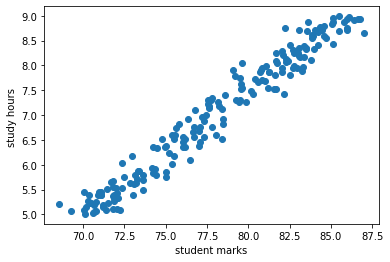

In [11]:
plt.scatter(x=df.student_marks,y=df.study_hours)
plt.xlabel("student marks")
plt.ylabel("study hours ")

# data cleaning

In [14]:
df.isnull().sum().sum()

5

In [15]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [17]:
df2=df.fillna(df.mean())

In [18]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [23]:
X=df2.drop("student_marks",axis=1)

In [22]:
y=df2.drop("study_hours",axis=1)

# train test split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=51)

# linear regression

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr.coef_

array([[3.93571802]])

In [28]:
lr.intercept_


array([50.44735504])

In [37]:
y_pred=lr.predict(X_test)


In [40]:
from sklearn.metrics import accuracy_score
lr.score(X_test,y_test)

0.9514124242154464

In [43]:
import pickle
pickle.dump(lr,open("smp.pkl","wb"))
student_marks_predictor=pickle.load(open("smp.pkl","rb"))
y_pred=student_marks_predictor.predict(X_test)
